In [21]:
!pip install livelossplot

In [23]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from livelossplot import PlotLossesKeras
from time import time
import datetime
import os

In [24]:
classes = 5                 # 5 emotions => Angry, Sad, Happy, Neutral, Surprise
img_rows, img_cols = 48, 48     # Target images size = 48 x 48
batch_size = 64                 # Use 32 images at once for training

In [25]:
train_dir = r"C:\Users\Lenovo\Desktop\New folder\python\openCV\Emotion Detection\train"
validation_dir = r"C:\Users\Lenovo\Desktop\New folder\python\openCV\Emotion Detection\validation"

Augment the data with random transformations

In [26]:
train_gen_data = ImageDataGenerator(
    rescale = 1/255,                    # Rescale the image RGB values between 0 and 1
    rotation_range = 30,                # Range within which pictures randomly rotate
    shear_range = 0.3,                  # Randomly apply Shear Transformations
    zoom_range = 0.3,                   # Randomly zooming inside pictures
    width_shift_range = 0.4,            # Randomly translate pictures vertically
    height_shift_range = 0.4,           # Randomly translate pictures horizontally
    horizontal_flip = True,             # Randomly flip half of images horizontally
    fill_mode = 'nearest'               # Fill in newly created pixels after rotation/shifting of image
)

In [27]:
validation_gen_data = ImageDataGenerator(rescale=1/255)

In [28]:
train_generator = train_gen_data.flow_from_directory(
    train_dir,
    color_mode = 'grayscale',
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True
)

Found 24256 images belonging to 5 classes.


In [29]:
valid_generator = validation_gen_data.flow_from_directory(
    validation_dir,
    color_mode = 'grayscale',
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True
)

Found 3006 images belonging to 5 classes.


In [30]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal', input_shape=(img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal', input_shape=(img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(classes, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 32)        0         
__________

In [31]:
checkpoint = ModelCheckpoint(r"C:\Users\Lenovo\Desktop\New folder\python\openCV\Emotion Detection\model.h5",
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

In [32]:
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=9,
                          verbose=1,
                          restore_best_weights=True)

In [33]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

In [37]:
callbacks = [earlystop, checkpoint, reduce_lr, PlotLossesKeras()]

In [38]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [39]:
train_samples = 24176
valid_samples = 3006
epochs = 25

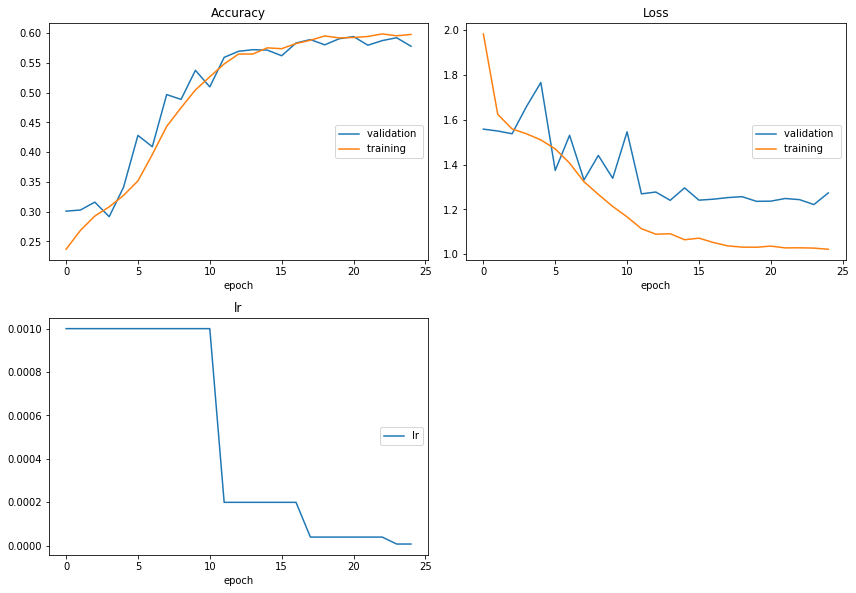

Accuracy
	validation       	 (min:    0.292, max:    0.594, cur:    0.578)
	training         	 (min:    0.237, max:    0.599, cur:    0.598)
Loss
	validation       	 (min:    1.222, max:    1.765, cur:    1.274)
	training         	 (min:    1.023, max:    1.982, cur:    1.023)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)


In [40]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples//batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=valid_generator,
    validation_steps=valid_samples//batch_size
)